# Sentiment Exploration in 50K IMDb Reviews

This notebook explores sentiment analysis on IMDb reviews using various machine learning models. The analysis includes data preprocessing, visualization of the dataset, and the implementation of different classifiers.


## Importing Libraries

Importing necessary libraries for data processing, visualization, and machine learning.


In [ ]:
# Import necessary libraries
import nltk
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.style as style
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Set the matplotlib style to 'ggplot'
style.use('ggplot')

# Download the stopwords and punkt dataset from NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Import NLTK modules for text processing
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

# Set of English stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#Loading and Exploring the Dataset
Loading the IMDb dataset, displaying basic information, and performing initial exploratory data analysis.

In [ ]:
# Specify the file path for the dataset
file_path = 'IMDB Dataset.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame
print(df)

                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]


In [ ]:
# Obtain the shape of the DataFrame
df_shape = df.shape

# Display the shape in a formatted way
print(f"The DataFrame has {df_shape[0]} rows and {df_shape[1]} columns.")


The DataFrame has 50000 rows and 2 columns.


In [ ]:
# Describe the DataFrame and store the result in a variable
df_summary = df.describe()

# Display the summary statistics
print("Summary Statistics:")
print(df_summary)


Summary Statistics:
                                                   review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000


In [ ]:
# Display information about the DataFrame
print("DataFrame Information:")
df_info = df.info()


DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


#Exploratory Data Analysis (EDA)
Visualizing the distribution of sentiments, analyzing word counts, and exploring common words in positive and negative reviews.

In [ ]:
# Create a count plot for the 'sentiment' column in the DataFrame
fig = px.histogram(df, x='sentiment', color='sentiment', title="Sentiment Display")

# Show the plot
fig.show()

In [ ]:
# Iterate over the first 5 rows of 'review' and 'sentiment' columns using enumerate and zip
for i, (review, sentiment) in enumerate(zip(df['review'].head(5), df['sentiment'].head(5)), start=1):
    # Print the index and review for each iteration
    print(f"Review {i}:")
    print(review, "\n")

    # Print the sentiment for each iteration
    print(f"Sentiment {i}: {sentiment}\n")

Review 1:
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due 

In [ ]:
# Define a function to count the number of words in a given text
def no_of_words(text):
    words = text.split()
    word_count = len(words)
    return word_count

# Apply the function to the 'review' column and create a new 'Word Count' column
df['Word Count'] = df['review'].apply(no_of_words)

In [ ]:
# Display the first few rows of the DataFrame
print("DataFrame Head:")
print(df.head())

DataFrame Head:
                                              review sentiment  Word Count
0  One of the other reviewers has mentioned that ...  positive         307
1  A wonderful little production. <br /><br />The...  positive         162
2  I thought this was a wonderful way to spend ti...  positive         166
3  Basically there's a family where a little boy ...  negative         138
4  Petter Mattei's "Love in the Time of Money" is...  positive         230


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming 'df' is your DataFrame

# Create a subplot with 1 row and 2 columns
fig = make_subplots(rows=1, cols=2, subplot_titles=('Positive Sentiment', 'Negative Sentiment'))

# Add histograms for positive and negative sentiment with different colors
fig.add_trace(go.Histogram(x=df[df['sentiment']=='positive']['Word Count'], nbinsx=30, marker_color='green'), row=1, col=1)
fig.add_trace(go.Histogram(x=df[df['sentiment']=='negative']['Word Count'], nbinsx=30, marker_color='orange'), row=1, col=2)

# Update layout
fig.update_layout(title_text="Number of Words in Review", showlegend=False)

# Show the plot
fig.show()


In [ ]:
# Create a subplot with 1 row and 2 columns
fig = make_subplots(rows=1, cols=2, subplot_titles=('Positive Sentiment', 'Negative Sentiment'))

# Add histograms for positive and negative sentiment with different colors
fig.add_trace(go.Histogram(x=df[df['sentiment']=='positive']['review'].str.len(), nbinsx=30, marker_color='green'), row=1, col=1)
fig.add_trace(go.Histogram(x=df[df['sentiment']=='negative']['review'].str.len(), nbinsx=30, marker_color='orange'), row=1, col=2)

# Update layout
fig.update_layout(title_text="Number of Words in Review", showlegend=False)

# Show the plot
fig.show()


In [ ]:
# Use map to replace 'positive' with 1 and 'negative' with 0 in the 'sentiment' column
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [ ]:
df.head()

,review,sentiment,Word Count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,0,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230


#Data Preprocessing
Cleaning and preprocessing the text data, including converting to lowercase, removing HTML tags, URLs, mentions, hashtags, non-alphanumeric characters, and stopwords.

In [ ]:
def data_processing(text):
    # Convert to lowercase
    text = text.lower()

    # Remove HTML tags and URLs
    text = re.sub('<br />|https?\S+|www\S+', '', text, flags=re.MULTILINE)

    # Remove mentions and hashtags
    text = re.sub(r'\@\w+|\#', '', text)

    # Remove non-alphanumeric characters (keeping spaces)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Tokenize the text
    text_tokens = word_tokenize(text)

    # Remove stopwords
    filtered_text = [word for word in text_tokens if word not in stop_words]

    # Join the filtered tokens to form processed text
    return " ".join(filtered_text)

In [ ]:

# Apply the data_processing function to the 'review' column
df['review'] = df['review'].apply(lambda x: data_processing(x))


In [ ]:
duplicated_count = len(df[df.duplicated()])
print("Number of duplicate entries:", duplicated_count)

Number of duplicate entries: 421


In [ ]:
df = df.drop_duplicates(subset='review').reset_index(drop=True)

In [ ]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [ ]:
df.review = df['review'].apply(lambda x: stemming(x))

In [ ]:
df['Word Count'] = df['review'].apply(no_of_words)
df.head()

,review,sentiment,Word Count
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
3,basically theres family little boy jake thinks...,0,67
4,petter matteis love time money visually stunni...,1,125


In [ ]:
# Extracting positive reviews from the DataFrame where sentiment is equal to 1
positive_reviews = df[df['sentiment'] == 1]

# Displaying the first few rows of positive reviews
positive_reviews_head = positive_reviews.head()

# Printing the result
print(positive_reviews_head)


                                              review  sentiment  Word Count
0  one reviewers mentioned watching 1 oz episode ...          1         168
1  wonderful little production filming technique ...          1          84
2  thought wonderful way spend time hot summer we...          1          86
4  petter matteis love time money visually stunni...          1         125
5  probably alltime favorite movie story selfless...          1          58


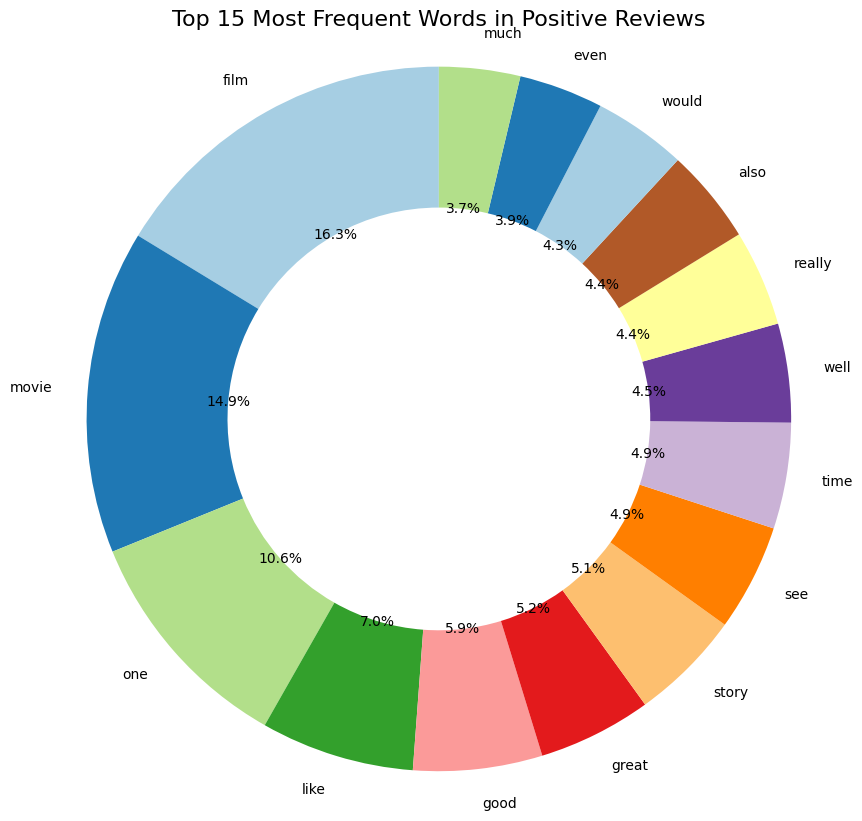

In [ ]:
# Importing a color palette for the pie chart
from palettable.colorbrewer.qualitative import Paired_12

# Assuming positive_reviews is your DataFrame with positive reviews and 'review' column
positive_reviews = df[df['sentiment'] == 1]

# Combine all positive reviews into a single string
positive_text = ' '.join(positive_reviews['review'].tolist())

# Tokenize the words in the positive reviews
words = positive_text.split()

# Count the frequency of each word
word_counts = Counter(words)

# Get the top N most frequent words
top_n_words = 15
top_words = dict(word_counts.most_common(top_n_words))

# Generate a WordCloud for better visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_words)

# Creating a nice color palette
colors = Paired_12.mpl_colors

# Plotting the pie chart with the specified colors
plt.figure(figsize=(10, 10))
plt.pie(top_words.values(), labels=top_words.keys(), autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4), colors=colors)
plt.title('Top {} Most Frequent Words in Positive Reviews'.format(top_n_words), fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()


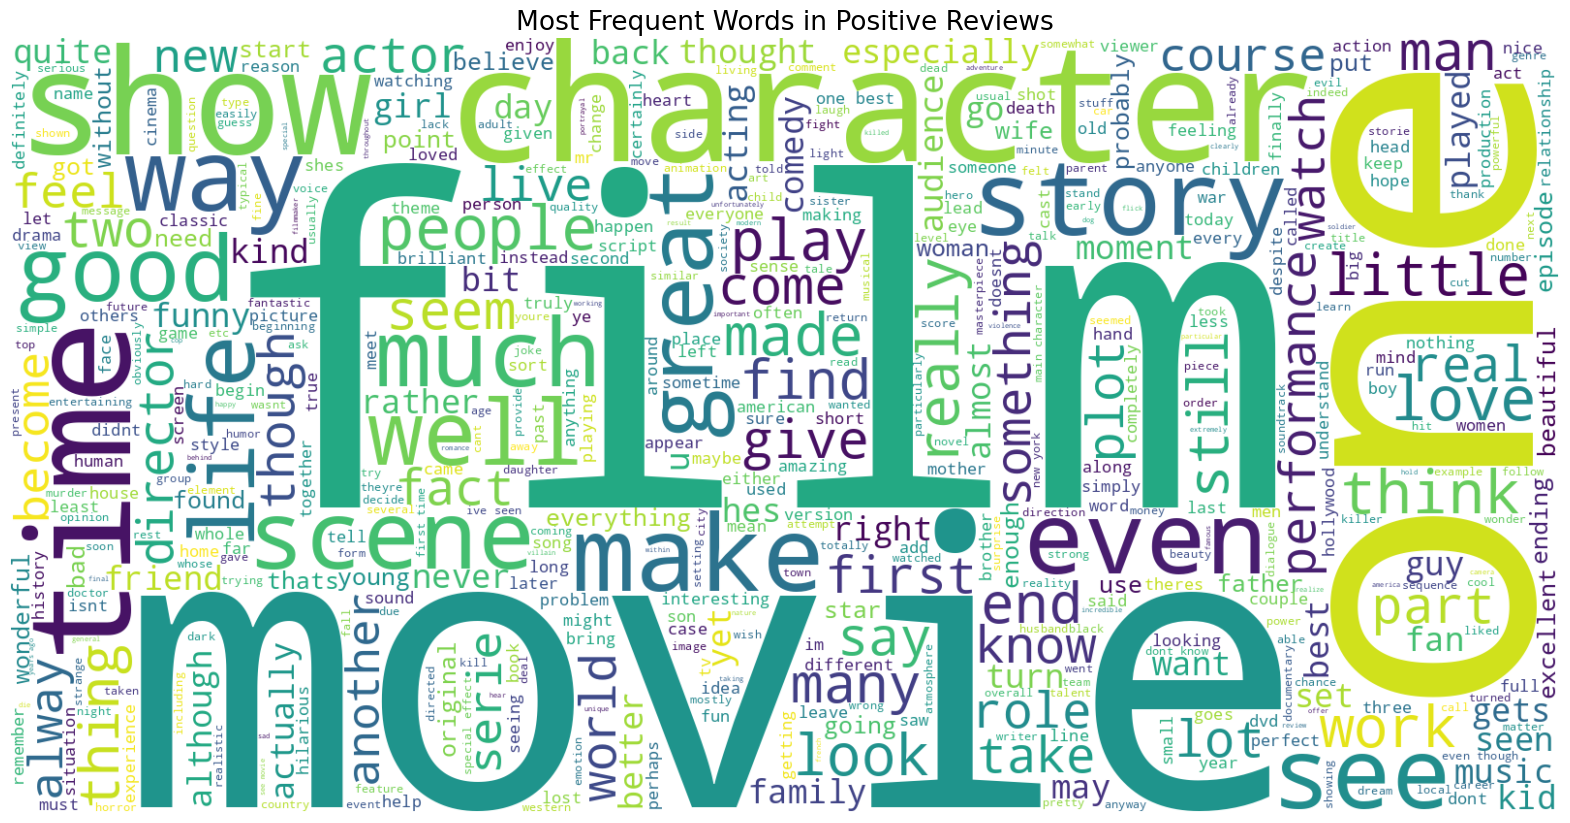

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all the words in positive reviews
text_positive_reviews = ''.join([word for word in positive_reviews['review']])

# Set up the WordCloud parameters
wordcloud_params = {
    'max_words': 500,
    'width': 1600,
    'height': 800,
    'background_color': 'white',  # Add white background color
}

# Generate WordCloud
wordcloud = WordCloud(**wordcloud_params).generate(text_positive_reviews)

# Plotting the WordCloud
plt.figure(figsize=(20, 15), facecolor='None')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Positive Reviews', fontsize=19)
plt.show()


In [ ]:
text_list = positive_reviews['review'].str.split().explode().tolist()
count = Counter()
count.update(text_list)

most_common_words = count.most_common(15)

for word, frequency in most_common_words:
    print(f"{word}: {frequency}")


film: 39285
movie: 35830
one: 25622
like: 16998
good: 14281
great: 12568
story: 12339
see: 11814
time: 11725
well: 10930
really: 10638
also: 10516
would: 10320
even: 9318
much: 8972


In [ ]:
# Get the 15 most common words and their counts
most_common_words = word_counts.most_common(15)

# Create a DataFrame from the most common words
pos_words_df = pd.DataFrame(most_common_words, columns=['words', 'count'])

# Display the first few rows of the DataFrame
print(pos_words_df.head())

   words  count
0   film  39285
1  movie  35830
2    one  25622
3   like  16998
4   good  14281


In [ ]:
fig = px.bar(pos_words_df, y='words', x='count',
             title='Common Words in Positive Reviews',
             orientation='h', text='count', color='count',
             labels={'count': 'Count'})

# Customize the layout
fig.update_layout(yaxis=dict(categoryorder='total ascending'),
                  xaxis_title='Count', yaxis_title='Words')

# Show the figure
fig.show()

In [ ]:

# Extracting negative reviews from the DataFrame where sentiment is equal to 1
negative_reviews = df[df['sentiment'] == 0]

# Displaying the first few rows of negative reviews
negative_reviews_head = negative_reviews.head()

# Printing the result
print(negative_reviews_head)

                                               review  sentiment  Word Count
3   basically theres family little boy jake thinks...          0          67
7   show amazing fresh innovative idea 70s first a...          0          83
8   encouraged positive comments film looking forw...          0          64
10  phil alien one quirky films humour based aroun...          0          51
11  saw movie 12 came recall scariest scene big bi...          0          84


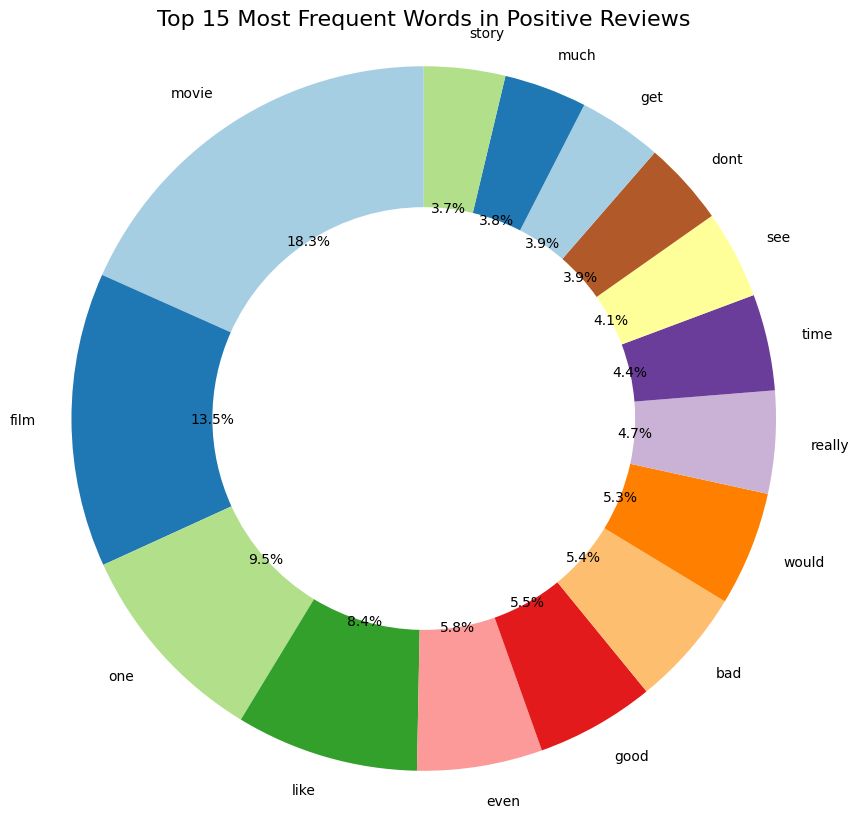

In [ ]:
# Importing a color palette for the pie chart
from palettable.colorbrewer.qualitative import Paired_12

# Assuming positive_reviews is your DataFrame with positive reviews and 'review' column
negative_reviews = df[df['sentiment'] == 0]

# Combine all positive reviews into a single string
negative_text = ' '.join(negative_reviews['review'].tolist())

# Tokenize the words in the positive reviews
words = negative_text.split()

# Count the frequency of each word
word_counts = Counter(words)

# Get the top N most frequent words
top_n_words = 15
top_words = dict(word_counts.most_common(top_n_words))

# Generate a WordCloud for better visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_words)

# Creating a nice color palette
colors = Paired_12.mpl_colors

# Plotting the pie chart with the specified colors
plt.figure(figsize=(10, 10))
plt.pie(top_words.values(), labels=top_words.keys(), autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4), colors=colors)
plt.title('Top {} Most Frequent Words in Positive Reviews'.format(top_n_words), fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()


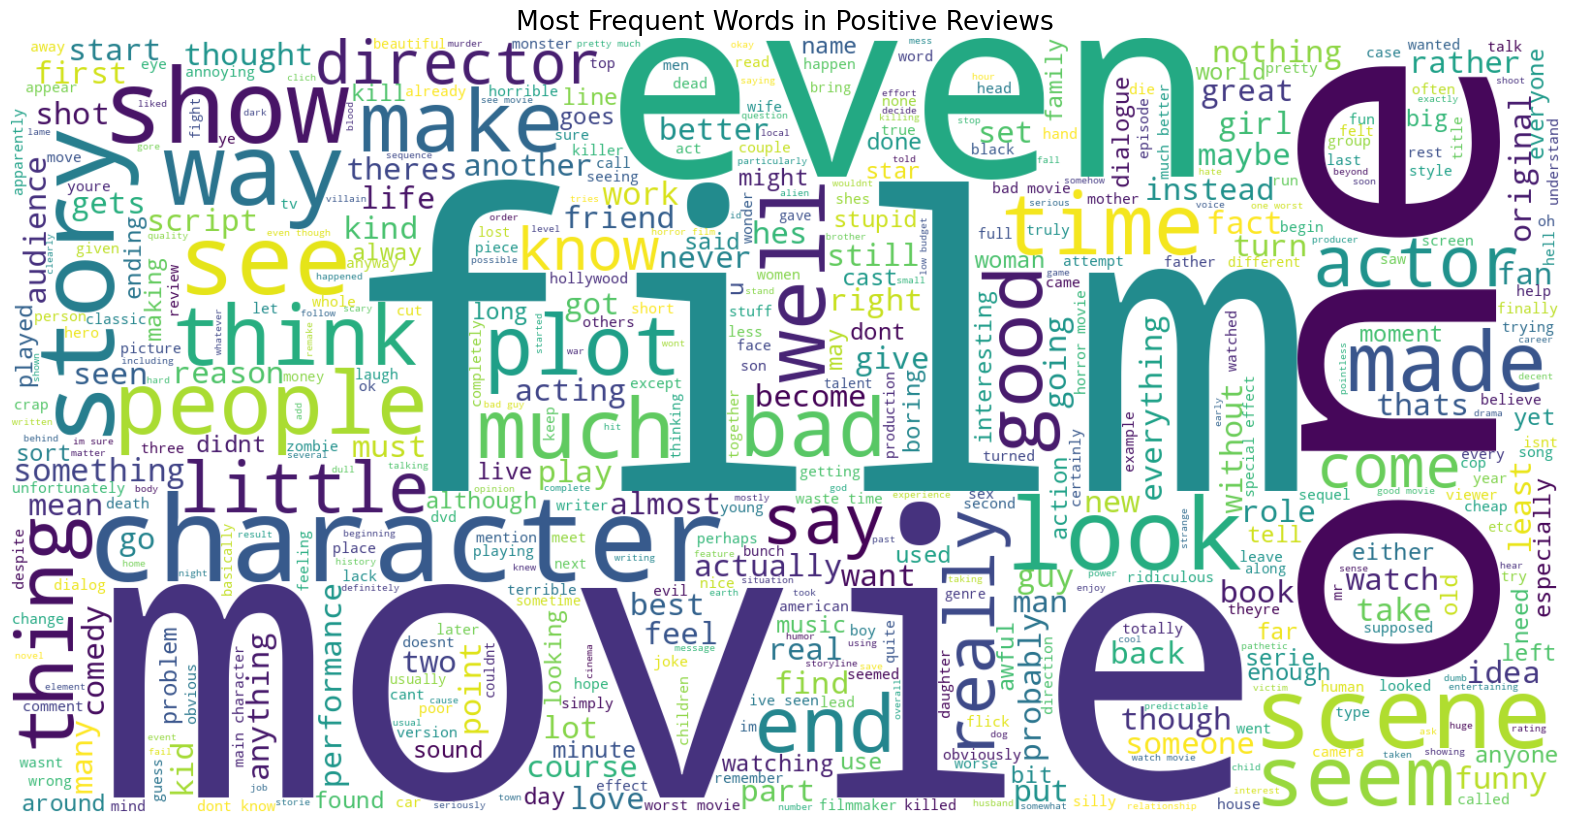

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all the words in positive reviews
text_negative_reviews = ''.join([word for word in negative_reviews['review']])

# Set up the WordCloud parameters
wordcloud_params = {
    'max_words': 500,
    'width': 1600,
    'height': 800,
    'background_color': 'white',  # Add white background color
}

# Generate WordCloud
wordcloud = WordCloud(**wordcloud_params).generate(text_negative_reviews)

# Plotting the WordCloud
plt.figure(figsize=(20, 15), facecolor='None')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Positive Reviews', fontsize=19)
plt.show()


In [ ]:
text_list = negative_reviews['review'].str.split().explode().tolist()
count = Counter()
count.update(text_list)

most_common_words = count.most_common(15)

for word, frequency in most_common_words:
    print(f"{word}: {frequency}")



movie: 47003
film: 34653
one: 24362
like: 21508
even: 14759
good: 13995
bad: 13904
would: 13482
really: 12084
time: 11350
see: 10412
dont: 9912
get: 9884
much: 9758
story: 9564


In [ ]:
negative_words = pd.DataFrame(count.most_common(15))
negative_words.columns = ['word','count']
negative_words.head()


,word,count
0,movie,47003
1,film,34653
2,one,24362
3,like,21508
4,even,14759


In [ ]:
# Assuming negative_words is your DataFrame with 'words' and 'count' columns
fig = px.bar(negative_words, y='word', x='count',
             title='Common Words in Negative Reviews',
             orientation='h', text='count', color='count',
             labels={'count': 'Count'})

# Customize the layout
fig.update_layout(yaxis=dict(categoryorder='total ascending'),
                  xaxis_title='Count', yaxis_title='Words')

# Show the figure
fig.show()


#Model Training and Evaluation
Training different machine learning models (Logistic Regression, Multinomial Naive Bayes, Linear Support Vector Classifier, Random Forest Classifier, Decision Tree Classifier) and evaluating their performance.

In [ ]:
# Extracting the 'review' column and assigning it to the variable X
X = df['review']

# Extracting the 'sentiment' column and assigning it to the variable Y
Y = df['sentiment']

In [ ]:
# Initializing a TfidfVectorizer
vect = TfidfVectorizer()

# Using fit_transform to convert the 'review' column into a TF-IDF matrix
X = vect.fit_transform(df['review'])

In [ ]:
# Splitting the data into training and testing sets
# test_size=0.3 means 30% of the data will be used for testing, and random_state ensures reproducibility
X_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
# Assuming X_train, y_train, x_test, y_test are already defined
print(f"Training set size - X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing set size - x_test: {x_test.shape}, y_test: {y_test.shape}")


Training set size - X_train: (34704, 221241), y_train: (34704,)
Testing set size - x_test: (14874, 221241), y_test: (14874,)


In [ ]:
# Importing necessary modules from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Ignoring warning messages for cleaner output
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Initializing and fitting Logistic Regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

# Making predictions on the test set
logreg_pred = logistic_regression_model.predict(x_test)

# Calculating and printing test accuracy
logreg_acc = accuracy_score(logreg_pred, y_test)
print(f"Test Accuracy: {logreg_acc*100:.2f}%")


Test Accuracy: 89.01%


In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, logreg_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, logreg_pred)
print("Classification Report:")
print(class_report)


Confusion Matrix:
[[6454  907]
 [ 728 6785]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7361
           1       0.88      0.90      0.89      7513

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, logreg_pred)

# Create a heatmap
heatmap = go.Figure(data=go.Heatmap(
                   z=conf_matrix,
                   x=['Predicted Negative', 'Predicted Positive'],
                   y=['Actual Negative', 'Actual Positive'],
                   colorscale='Viridis',
                   showscale=True))

# Customize layout
heatmap.update_layout(title='Confusion Matrix',
                      xaxis_title='Predicted Label',
                      yaxis_title='Actual Label')

# Show the heatmap
heatmap.show()


In [ ]:
# Initializing and fitting Multinomial Naive Bayes model
mnb_model = MultinomialNB()
mnb_model.fit(X_train, y_train)

# Making predictions on the test set
mnb_pred = mnb_model.predict(x_test)

# Calculating and printing test accuracy
mnb_acc = accuracy_score(mnb_pred, y_test)
print(f"Test Accuracy: {mnb_acc*100:.2f}%")

Test Accuracy: 86.45%


In [ ]:
# Confusion matrix
conf_matrix_mnb = confusion_matrix(y_test, mnb_pred)
print("Confusion Matrix:")
print(conf_matrix_mnb)

# Classification report
class_report_mnb = classification_report(y_test, mnb_pred)
print("Classification Report:")
print(class_report_mnb)


Confusion Matrix:
[[6421  940]
 [1076 6437]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      7361
           1       0.87      0.86      0.86      7513

    accuracy                           0.86     14874
   macro avg       0.86      0.86      0.86     14874
weighted avg       0.86      0.86      0.86     14874



In [ ]:
# Confusion matrix for Multinomial Naive Bayes
conf_matrix_mnb = confusion_matrix(y_test, mnb_pred)

# Create a heatmap
heatmap_mnb = go.Figure(data=go.Heatmap(
                   z=conf_matrix_mnb,
                   x=['Predicted Negative', 'Predicted Positive'],
                   y=['Actual Negative', 'Actual Positive'],
                   colorscale='Viridis',
                   showscale=True))

# Customize layout
heatmap_mnb.update_layout(title='Confusion Matrix - Multinomial Naive Bayes',
                         xaxis_title='Predicted Label',
                         yaxis_title='Actual Label')

# Show the heatmap
heatmap_mnb.show()


In [ ]:
# Initializing and fitting Linear Support Vector Classifier (LinearSVC) model
svc_model = LinearSVC()
svc_model.fit(X_train, y_train)

# Making predictions on the test set
svc_pred = svc_model.predict(x_test)

# Calculating and printing test accuracy
svc_acc = accuracy_score(svc_pred, y_test)
print(f"Test Accuracy: {svc_acc*100:.2f}%")


Test Accuracy: 89.25%


In [ ]:
# Confusion matrix
conf_matrix_svc = confusion_matrix(y_test, svc_pred)
print("Confusion Matrix:")
print(conf_matrix_svc)

# Classification report
class_report_svc = classification_report(y_test, svc_pred)
print("Classification Report:")
print(class_report_svc)


Confusion Matrix:
[[6504  857]
 [ 742 6771]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7361
           1       0.89      0.90      0.89      7513

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



In [ ]:
# Confusion matrix for LinearSVC
conf_matrix_svc = confusion_matrix(y_test, svc_pred)

# Create a heatmap
heatmap_svc = go.Figure(data=go.Heatmap(
                   z=conf_matrix_svc,
                   x=['Predicted Negative', 'Predicted Positive'],
                   y=['Actual Negative', 'Actual Positive'],
                   colorscale='Viridis',
                   showscale=True))

# Customize layout
heatmap_svc.update_layout(title='Confusion Matrix - LinearSVC',
                          xaxis_title='Predicted Label',
                          yaxis_title='Actual Label')

# Show the heatmap
heatmap_svc.show()


In [ ]:
# Initializing and fitting Random Forest Classifier (RandomForestClassifier) model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

# Making predictions on the test set
ranf_pred = random_forest_model.predict(x_test)

# Calculating and printing test accuracy
ranf_acc = accuracy_score(ranf_pred, y_test)
print(f"Test Accuracy: {ranf_acc*100:.2f}%")



Test Accuracy: 85.12%


In [ ]:
# Confusion matrix
conf_matrix_ranf = confusion_matrix(y_test, ranf_pred)
print("Confusion Matrix:")
print(conf_matrix_ranf)

# Classification report
class_report_ranf = classification_report(y_test, ranf_pred)
print("Classification Report:")
print(class_report_ranf)


Confusion Matrix:
[[6289 1072]
 [1141 6372]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      7361
           1       0.86      0.85      0.85      7513

    accuracy                           0.85     14874
   macro avg       0.85      0.85      0.85     14874
weighted avg       0.85      0.85      0.85     14874



In [ ]:
# Confusion matrix for Random Forest Classifier
conf_matrix_ranf = confusion_matrix(y_test, ranf_pred)

# Create a heatmap
heatmap_ranf = go.Figure(data=go.Heatmap(
                   z=conf_matrix_ranf,
                   x=['Predicted Negative', 'Predicted Positive'],
                   y=['Actual Negative', 'Actual Positive'],
                   colorscale='Viridis',
                   showscale=True))

# Customize layout
heatmap_ranf.update_layout(title='Confusion Matrix - Random Forest Classifier',
                           xaxis_title='Predicted Label',
                           yaxis_title='Actual Label')

# Show the heatmap
heatmap_ranf.show()


In [ ]:
# Initializing and fitting Decision Tree Classifier (DecisionTreeClassifier) model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

# Making predictions on the test set
dt_pred = decision_tree_model.predict(x_test)

# Calculating and printing test accuracy
dt_acc = accuracy_score(dt_pred, y_test)
print(f"Test Accuracy: {dt_acc*100:.2f}%")


Test Accuracy: 71.55%


In [ ]:
# Confusion matrix
conf_matrix_dt = confusion_matrix(y_test, dt_pred)
print("Confusion Matrix:")
print(conf_matrix_dt)

# Classification report
class_report_dt = classification_report(y_test, dt_pred)
print("Classification Report:")
print(class_report_dt)


Confusion Matrix:
[[5234 2127]
 [2104 5409]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      7361
           1       0.72      0.72      0.72      7513

    accuracy                           0.72     14874
   macro avg       0.72      0.72      0.72     14874
weighted avg       0.72      0.72      0.72     14874



In [ ]:
# Confusion matrix for Decision Tree Classifier
conf_matrix_dt = confusion_matrix(y_test, dt_pred)

# Create a heatmap
heatmap_dt = go.Figure(data=go.Heatmap(
                   z=conf_matrix_dt,
                   x=['Predicted Negative', 'Predicted Positive'],
                   y=['Actual Negative', 'Actual Positive'],
                   colorscale='Viridis',
                   showscale=True))

# Customize layout
heatmap_dt.update_layout(title='Confusion Matrix - Decision Tree Classifier',
                         xaxis_title='Predicted Label',
                         yaxis_title='Actual Label')

# Show the heatmap
heatmap_dt.show()


#Model Comparison and Selection
Comparing the accuracy of each model and selecting the best one.

In [ ]:
# Print the accuracy of each model
print("Logistic Regression Accuracy:", logreg_acc * 100)
print("Multinomial Naive Bayes Accuracy:", mnb_acc * 100)
print("Linear Support Vector Machine Accuracy:", svc_acc * 100)
print("Random Forest Classifier Accuracy:", ranf_acc * 100)
print("Decision Tree Classifier Accuracy:", dt_acc * 100)

# Find the best model based on accuracy
best_model_accuracy = max(logreg_acc, mnb_acc, svc_acc, ranf_acc, dt_acc)
best_model_name = None

if best_model_accuracy == logreg_acc:
  best_model_name = "Logistic Regression"
elif best_model_accuracy == mnb_acc:
  best_model_name = "Multinomial Naive Bayes"
elif best_model_accuracy == svc_acc:
  best_model_name = "Linear Support Vector Machine"
elif best_model_accuracy == ranf_acc:
  best_model_name = "Random Forest Classifier"
else:
  best_model_name = "Decision Tree Classifier"

# Print the best model name and accuracy
print("\nBest Model:", best_model_name)
print("Best Model Accuracy:", best_model_accuracy * 100)


Logistic Regression Accuracy: 89.00766438079872
Multinomial Naive Bayes Accuracy: 86.4461476401775
Linear Support Vector Machine Accuracy: 89.24969745865268
Random Forest Classifier Accuracy: 85.12168885303214
Decision Tree Classifier Accuracy: 71.55439021110664

Best Model: Linear Support Vector Machine
Best Model Accuracy: 89.24969745865268
